NAME: AMOOLYA G USN: 20202AIE0007 MAIL ID1: AMOOLYA.20202AIE0007@PRESIDENCYUNIVERSITY.IN MAIL ID2: amoolya.g99@gmail.com BRANCH: ARTIFICIAL INTELLIGENCE

PURPOSE OF PROJECT 2: DIMENSION REDUCTION USING PCA ON THE OBTAINED DATASET FROM RAVDESS DATA FROM THE PREVIOUS PROJECT. BUILDING THE MODEL FOR THE RAVDESS DTATASET AND FINDING OUT THE ACCURACY USING DIFFERENT ALGORITHMS.

In [ ]:
#importing libraries 
import glob
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#loading the csv file from drive
dataset= pd.read_csv(r'/content/drive/MyDrive/amoolya.csv')
dataset

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,...,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,3
1,1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,...,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,4
2,2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,...,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,1
3,3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,...,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,3
4,4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,...,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#dropping the unnamed: 0 column from the dataset
dataset= dataset.drop(['Unnamed: 0'], axis=1)


In [ ]:
#output of the dataset after dropping the unnamed: 0 column
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,3
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,4
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,1
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,3
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#dropping the target column and storing it in a new dataframe
#creating a new dataframe that contains only the target column
x= dataset.drop('Emotions', 1)
y= dataset['Emotions']

In [ ]:
#splitting the dataset to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

             0         1         2  ...       102       103       104
106   0.070148  0.070148  0.070148  ...  0.051540  0.049171  0.049299
1288  0.068809  0.068809  0.068809  ...  0.056941  0.057193  0.056501
864   0.050915  0.051109  0.050625  ...  0.036652  0.036485  0.038678
876   0.043187  0.043548  0.044359  ...  0.046117  0.047317  0.044835
420   0.070125  0.070125  0.070125  ...  0.069937  0.065896  0.057982
...        ...       ...       ...  ...       ...       ...       ...
802   0.056129  0.051813  0.051305  ...  0.066629  0.071785  0.068904
53    0.070681  0.070681  0.070681  ...  0.070681  0.070681  0.070681
350   0.043454  0.041005  0.041209  ...  0.028207  0.023209  0.021019
79    0.044418  0.044389  0.044367  ...  0.033629  0.034112  0.035089
792   0.036644  0.037724  0.040619  ...  0.061973  0.059151  0.058128

[1008 rows x 105 columns]
             0         1         2  ...       102       103       104
1320  0.058525  0.058525  0.058560  ...  0.057203  0.057284  0.

In [ ]:
#principle component analysis for 5 components
pca= PCA(n_components= 5)

X_train= pca.fit_transform(x_train)
X_test= pca.transform(x_test)

In [ ]:
#checking the shape of the train dataset without the target column
X_train.shape

(1008, 5)

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Parameters set to their defaults
lgr1 = LogisticRegression()


#Fit for train data
lgr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting for test dataset
y_pred_lg=lgr1.predict(X_test)

In [ ]:
y_pred = y_pred_lg
model  = lgr1

In [ ]:
#scores for train and test datasets
score_train = model.score(X_train, y_train)
score_test  = model.score(X_test, y_test)

In [ ]:
#accuracy for train and test
print('Accuracy for Train: ', score_train)
print('Accuracy for Test: ', score_test)

Accuracy for Train:  0.24603174603174602
Accuracy for Test:  0.18981481481481483


In [ ]:
#confusion matrix for logistic regression

Accuracy for Train:  0.24603174603174602
Accuracy for Test:  0.18981481481481483
[[ 0 26  6  0  3  0  0  0]
 [ 0 32  9  0  5  0  5  0]
 [ 0 15  8  0 28  0  1  1]
 [ 0 30 12  0 14  0  2  0]
 [ 0 11  7  1 32  0  0  0]
 [ 0 15  9  0 34  0  5  2]
 [ 0 30  3  1 11  0 10  0]
 [ 0 31 22  0 11  0  0  0]]
Correct Classification : 82
Mis- Classifications : 350


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


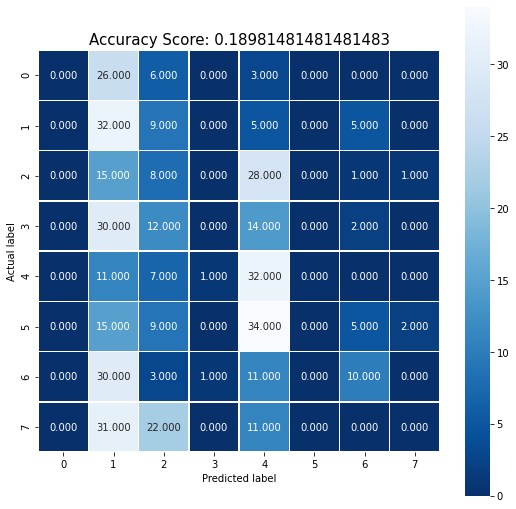

In [ ]:
#Metrics
from sklearn import metrics

#Accuracy ->correct predictions / total number of data points
#score_train = model.score(x_train, y_train)
#score_test  = model.score(x_test, y_test)

print('Accuracy for Train: ', score_train)
print('Accuracy for Test: ', score_test)

#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15);

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print('Correct Classification :', TP.sum())
print('Mis- Classifications :', cm.sum() - TP.sum())
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised 

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
# Parameters set 
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
#Fit for train data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#predicting for train dataset
y_pred = classifier.predict(X_train)#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 1.0


In [ ]:
#predicting accuracy for test dataset
y_pred = classifier.predict(X_test)#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.18287037037037038


RANDOM FOREST CLASSIFIER ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
# Parameters set 
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
#fit for train data 
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#preidcting for test data
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#outcomes for test data
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 4 13  7  4  1  1  3  2]
 [ 6 21  6  4  2  2  7  3]
 [ 6  4  9  5 12  8  6  3]
 [ 6  6  6 14  5 11  4  6]
 [ 2  5  8  2 19  7  4  4]
 [ 0  6 17  4 21  8  6  3]
 [ 0 10  6 12  9  3 13  2]
 [ 6  2 16  6  3  8  8 15]]
              precision    recall  f1-score   support

           1       0.13      0.11      0.12        35
           2       0.31      0.41      0.36        51
           3       0.12      0.17      0.14        53
           4       0.27      0.24      0.26        58
           5       0.26      0.37      0.31        51
           6       0.17      0.12      0.14        65
           7       0.25      0.24      0.25        55
           8       0.39      0.23      0.29        64

    accuracy                           0.24       432
   macro avg       0.24      0.24      0.23       432
weighted avg       0.25      0.24      0.24       432

0.23842592592592593


XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
#parameters set to efault
model = XGBClassifier()
#fit for train data
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


Target on train data [6 4 5 ... 5 5 1]


In [ ]:
# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.6666666666666666


In [ ]:
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print(accuracy_score(y_train, predict_train))

[[ 31   7   3  14   0   0   4   2]
 [  0 108   8  12   4   1   4   4]
 [  1   5  89   7  17   4   8   8]
 [  0  16   6  93   5   2   9   3]
 [  1   4   7   6 104   2   9   8]
 [  2   5   9   6  13  74   7  11]
 [  0  16   6  11  11   1  84   8]
 [  0   3   6   9  15   0   6  89]]
              precision    recall  f1-score   support

           1       0.89      0.51      0.65        61
           2       0.66      0.77      0.71       141
           3       0.66      0.64      0.65       139
           4       0.59      0.69      0.64       134
           5       0.62      0.74      0.67       141
           6       0.88      0.58      0.70       127
           7       0.64      0.61      0.63       137
           8       0.67      0.70      0.68       128

    accuracy                           0.67      1008
   macro avg       0.70      0.65      0.67      1008
weighted avg       0.68      0.67      0.67      1008

0.6666666666666666


In [ ]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 


Target on test data [6 6 2 7 7 2 5 8 3 2 5 4 7 6 7 4 6 5 3 4 3 6 2 8 4 2 5 3 5 5 2 8 2 8 5 8 3
 3 2 1 5 5 5 7 5 8 5 7 3 5 3 8 8 3 7 7 6 4 2 7 4 8 7 6 4 5 5 6 6 6 5 3 8 5
 2 4 6 8 8 1 3 8 8 2 7 5 3 2 4 3 7 6 7 4 7 5 7 4 2 4 4 4 5 7 8 5 2 5 2 6 3
 7 1 4 8 6 2 2 5 3 5 2 8 2 5 6 5 7 4 7 3 8 2 5 6 4 6 5 6 3 2 2 2 2 8 4 7 1
 7 7 7 2 5 5 6 7 5 6 2 5 5 7 3 8 7 5 7 7 8 8 2 4 3 3 4 8 5 5 6 3 4 4 4 3 3
 7 3 3 7 4 4 6 3 8 4 2 5 5 4 6 8 2 8 7 2 8 4 5 6 5 3 8 3 7 3 7 8 5 4 4 5 3
 6 4 8 7 7 6 1 2 6 3 4 8 3 2 3 8 7 4 8 2 8 6 8 3 8 8 2 2 5 4 6 2 5 7 2 7 7
 3 4 8 5 5 5 2 4 3 2 5 5 8 5 5 4 7 2 7 3 2 3 5 5 5 5 1 8 2 5 8 1 4 7 8 2 1
 2 5 5 2 5 4 8 2 2 4 5 2 3 5 2 2 2 5 3 6 8 4 5 7 8 2 5 2 6 3 4 8 2 5 6 3 4
 8 3 7 4 6 6 8 7 4 7 4 8 2 5 2 2 8 2 7 3 4 4 4 7 2 8 8 7 5 2 7 7 4 8 3 5 6
 4 7 4 8 4 2 2 5 6 6 5 6 5 2 4 2 1 8 8 3 6 1 7 8 7 5 5 3 6 8 8 2 7 5 4 5 6
 3 5 6 4 6 1 6 8 6 8 8 2 7 4 8 4 5 6 3 3 5 1 4 3 6]


In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.2638888888888889


In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

[[ 2  9  2  3  3  2  5  9]
 [ 0 23  9  6  3  3  7  0]
 [ 0  2  7 10 13  5 11  5]
 [ 4  8  3 16  6  9  6  6]
 [ 1  1  3  6 22  5  4  9]
 [ 0  7  7  5 20 11  5 10]
 [ 0 10  7 10  5  6 13  4]
 [ 5  6 13  3  6  6  5 20]]
              precision    recall  f1-score   support

           1       0.17      0.06      0.09        35
           2       0.35      0.45      0.39        51
           3       0.14      0.13      0.13        53
           4       0.27      0.28      0.27        58
           5       0.28      0.43      0.34        51
           6       0.23      0.17      0.20        65
           7       0.23      0.24      0.23        55
           8       0.32      0.31      0.31        64

    accuracy                           0.26       432
   macro avg       0.25      0.26      0.25       432
weighted avg       0.25      0.26      0.25       432

0.2638888888888889


GAUSSIAN NB ALGORITHM

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred= nb.predict(X_test)

In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.2361111111111111


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 4 15  3  7  0  0  4  2]
 [ 2 26  5  5  1  2 10  0]
 [ 3  8 13  6 11  4  6  2]
 [ 3 19  7  8  6  5  7  3]
 [ 1  4  6  4 19  4  6  7]
 [ 0  4  8 11 21  4 11  6]
 [ 2 19  5  9  2  1 14  3]
 [12  9 11 10  4  3  1 14]]
              precision    recall  f1-score   support

           1       0.15      0.11      0.13        35
           2       0.25      0.51      0.34        51
           3       0.22      0.25      0.23        53
           4       0.13      0.14      0.14        58
           5       0.30      0.37      0.33        51
           6       0.17      0.06      0.09        65
           7       0.24      0.25      0.25        55
           8       0.38      0.22      0.28        64

    accuracy                           0.24       432
   macro avg       0.23      0.24      0.22       432
weighted avg       0.23      0.24      0.22       432

0.2361111111111111


SGD CLASSIFIER ALGORITHM

In [ ]:
from sklearn.linear_model import SGDClassifier
#parameters set
sgd= SGDClassifier()
#fir for train data
sgd.fit(X_train, y_train)
#predict on test data
y_pred= sgd.predict(X_test)

In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.1712962962962963


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 7 25  0  0  0  0  3  0]
 [ 1 41  0  0  1  1  7  0]
 [ 3 27  0  0 12  1  8  2]
 [ 9 36  0  0  7  2  4  0]
 [ 4 18  0  0 14  2  8  5]
 [ 6 24  0  0 18  4  6  7]
 [ 3 41  0  0  2  0  8  1]
 [18 30  0  0  3  1 12  0]]
              precision    recall  f1-score   support

           1       0.14      0.20      0.16        35
           2       0.17      0.80      0.28        51
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        58
           5       0.25      0.27      0.26        51
           6       0.36      0.06      0.11        65
           7       0.14      0.15      0.14        55
           8       0.00      0.00      0.00        64

    accuracy                           0.17       432
   macro avg       0.13      0.19      0.12       432
weighted avg       0.13      0.17      0.11       432

0.1712962962962963


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K NEAREST NEIGHBORS(KNN) ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#parameters set to default
knn= KNeighborsClassifier()
#fit for train data
knn.fit(X_train, y_train)
#predict for test data
y_pred= knn.predict(X_test)


In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.22916666666666666


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 5 10  4  5  1  3  5  2]
 [ 4 29  6  6  3  1  2  0]
 [ 7  5 10  2 10  7  6  6]
 [ 8  9  5  7  7 10  7  5]
 [ 3  7 10  1 15  9  5  1]
 [ 2  6 14  6 19  8  5  5]
 [ 6  9  8  8  7  1 14  2]
 [13  4 15  7  4  6  4 11]]
              precision    recall  f1-score   support

           1       0.10      0.14      0.12        35
           2       0.37      0.57      0.45        51
           3       0.14      0.19      0.16        53
           4       0.17      0.12      0.14        58
           5       0.23      0.29      0.26        51
           6       0.18      0.12      0.15        65
           7       0.29      0.25      0.27        55
           8       0.34      0.17      0.23        64

    accuracy                           0.23       432
   macro avg       0.23      0.23      0.22       432
weighted avg       0.23      0.23      0.22       432

0.22916666666666666


SUPPORT VECTOR MACHINE (SVM) ALGORITHM

In [ ]:
from sklearn.svm import SVC
#parameters set to default
svm= SVC()
#fit for train data
svm.fit(X_train, y_train)
#predict for test data
y_pred= svm.predict(X_test)

In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.27546296296296297


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 1 11  5  9  1  0  3  5]
 [ 1 21  9  9  2  1  7  1]
 [ 0  2 13  9 15  3  4  7]
 [ 1 10  6 13  8  4 11  5]
 [ 1  0  3  5 27  2  6  7]
 [ 0  1 10  6 23  6 10  9]
 [ 0  7  5 11  5  1 19  7]
 [ 4  2 20  8  6  2  3 19]]
              precision    recall  f1-score   support

           1       0.12      0.03      0.05        35
           2       0.39      0.41      0.40        51
           3       0.18      0.25      0.21        53
           4       0.19      0.22      0.20        58
           5       0.31      0.53      0.39        51
           6       0.32      0.09      0.14        65
           7       0.30      0.35      0.32        55
           8       0.32      0.30      0.31        64

    accuracy                           0.28       432
   macro avg       0.27      0.27      0.25       432
weighted avg       0.27      0.28      0.26       432

0.27546296296296297


CONCLUDING BY SAYING WE GOT THE HIGHEST TEST ACCURACY SCORE OF 27.54% USING SVM AND SECOND HIGHEST OF 26.38% USING XGBOOST CLASSIFIER ALGORITHM. IN SVM, WE COULD SEE THAT THERE WERE 119 CORRECT CLASSIFICATION AND THE 4TH EMOTION I.E, SAD IS DETECTED THE MOST CORRECTLY.